## Can we write a Sonnet like its the middle ages?

![sonnet](https://github.com/PraveenKumarSridhar/poetry-generator/blob/develop/src/Sonnets/Training/Sonnet_art.jpg?raw=1)

In [ ]:
!pip install tensorflow==2.1.0

### 1.0 Loading the data
<hr/>
Let's start with loading the actual data and seeing a small sample of it, say the first 300 characters.

In [61]:
data = open('/content/sonnets.txt').read()
data[0:300]

"FROM fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou, contracted to thine own bright eyes,\nFeed'st thy light'st flame with self-substantial fuel,\nMaking a famine where abundance"

### 2.0 Load the packages
<hr/>
Remeber to check the requirements file for packages used.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers 
import tensorflow.keras.utils as ku 
import numpy as np 

Checking the tensorflow version

In [4]:
import tensorflow as tf
print(tf.__version__)

2.1.0


### 3.0 Tokenizing the training data
<hr/>

In [62]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print('Total number of words in corpus:',total_words)

Total number of words in corpus: 3211


### 4.0 Preparing the data for training
<hr/>
This is the most important part of this entire script and can be broadly split into 5 steps. So let's get into it shall we,

For each line in the txt file (training data):
 #### 4.1) Converting text to sequences.

   You can do that using the following:

    tokenizer.texts_to_sequences([line])
    
   Once you convert the text to sequence the output of it would look some thing like the following:

    [34, 417, 877, 166, 213, 517]
 
 #### 4.2) Creating the N_gram sequences.
   Now to create N-gram sequences that would look like 

    [34,417]
    [34,417,877] 
    [34,417,877,166]
    [34,417,877,166,213]
    [34,417,877,166,213,517]

 #### 4.3) Finding the max sequence length and the padding the rest.
  
   The first thing to do here is to find the larges sequence length. After that, you are going to do pre padding using:

    pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

   Once you are done it would look something like this:

    [0,0,0,0,34,417]
    [0,0,0,34,417,877] 
    [0,0,34,417,877,166]
    [0,34,417,877,166,213]
    [34,417,877,166,213,517]

 #### 4.4) Creating the predictors and the labels.

   This is where the most interesting part comes in, we are going to consider the last element in the N_gram sequence arrays we got above as labes and the rest of the array as the predictors:
    
    PREDICTORS                      LABLES
    [0,0,0,0,34]                     417
    [0,0,0,34,417]                   877
    [0,0,34,417,877]                 166
    [0,34,417,877,166]               213
    [34,417,877,166,213]             517

The code for all of the above steps are concatenated together in the next code block:


In [6]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

#### 5.0 Defining the model
<hr/>
This is where we are going to define the models architechure.

In [63]:
# Defining the model.
model = Sequential()

model.add(Embedding(total_words,100,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.18))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_41 (Bidirectio (None, 10, 300)           301200    
_________________________________________________________________
dropout_21 (Dropout)         (None, 10, 300)           0         
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 200)               320800    
_________________________________________________________________
dense_48 (Dense)             (None, 1605)              322605    
_________________________________________________________________
dense_49 (Dense)             (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
___________________________________________

#### 6.0 Training the model
<hr/>
Now to actually start training the model.

In [64]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 10s 651us/sample - loss: 6.9769 - accuracy: 0.0207
Epoch 2/100
15462/15462 [==============================] - 7s 436us/sample - loss: 6.5108 - accuracy: 0.0221
Epoch 3/100
15462/15462 [==============================] - 7s 431us/sample - loss: 6.4179 - accuracy: 0.0223
Epoch 4/100
15462/15462 [==============================] - 7s 436us/sample - loss: 6.3036 - accuracy: 0.0302
Epoch 5/100
15462/15462 [==============================] - 7s 436us/sample - loss: 6.2009 - accuracy: 0.0343
Epoch 6/100
15462/15462 [==============================] - 7s 439us/sample - loss: 6.1077 - accuracy: 0.0397
Epoch 7/100
15462/15462 [==============================] - 7s 438us/sample - loss: 6.0155 - accuracy: 0.0417
Epoch 8/100
15462/15462 [==============================] - 7s 438us/sample - loss: 5.9186 - accuracy: 0.0453
Epoch 9/100
15462/15462 [==============================] - 7s 435us/sample - loss: 5.8107 - accuracy: 0.

#### 7.0 Ploting the performance of the model.
<hr/>

Here we are going to plot 2 graphs ***accuracy vs epochs*** and ***loss vs epochs*** .

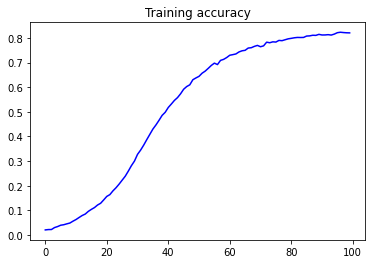

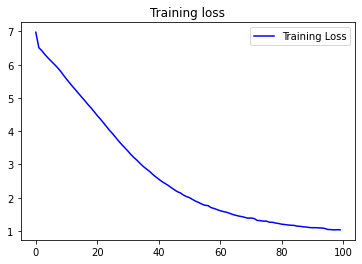

In [65]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()
plt.savefig('/content/accuracy_plot.png')

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.savefig('/content/loss_plot.png')

plt.show()

#### 7.0 Testing the model
<hr/>
To test the model we have to give 2 inputs:

1. Input text or seed text so the network can start predicting. and,
2. The number of words you want thenetwork to predict. 

#### **NOTE : There is one major caveat to this, as the network predicts the subsequent words its loss will multiply with each new word it predicts.**

In [67]:
seed_text = "O Ray of sunshine"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

O Ray of sunshine this sin what in thee array grows so lie new die dearer their strong hide prove thee seen their chest be gay commence account it cheeks worth new one strong


#### 8.0 Conclusion
<hr/>
This was done using word embeddings in the next notbook lets see how character level embedding measure up against this approach.